<a href="https://colab.research.google.com/github/truongthuanr/self-learning-project/blob/main/05_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information


**Data:** 
* Kaggle: [Amazon Fine Food Reviews](https://www.kaggle.com/snap/amazon-fine-food-reviews)

**Problem:**
* To determine whether a review is positive or negative

**Reference:**
* [A Beginner’s Guide to Sentiment Analysis](https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6)
* [A Complete Step by Step Tutorial on Sentiment Analysis in Keras and Tensorflow](https://towardsdatascience.com/a-complete-step-by-step-tutorial-on-sentiment-analysis-in-keras-and-tensorflow-ea420cc8913f)
* [A Step-by-Step Tutorial for Conducting Sentiment Analysis](https://towardsdatascience.com/a-step-by-step-tutorial-for-conducting-sentiment-analysis-a7190a444366)

# Import data

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/01_Personal/01_Study/01_ML/03_FoodReviews/Dataset/Reviews.csv")

In [5]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Data Analysis 

In [8]:
# Import Plotly library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

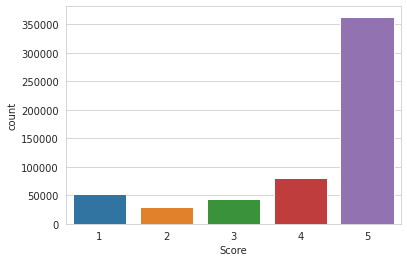

In [18]:
# Check product score
sns.set_style("whitegrid")
sns.countplot(x=df["Score"])

In [14]:
df["Score"].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64